<a href="https://colab.research.google.com/github/mkbahk/QuantumComputing/blob/main/Quantum_BasisAndMesurements_mkbahk_20250407.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install qiskit[visualization]==1.2.4
%pip install qiskit-aer==0.15.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 9.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 49.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.7/119.7 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 47.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 6.3 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=419872d2be0a97e2ecde8d23895447a207032a6c13fa8bfb5672b06ad66ee1e5
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
Successfully built pylatexenc
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 25.7 MB/s eta 0:00:00


In [2]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile, assemble
from qiskit.quantum_info import Statevector, SparsePauliOp
from qiskit.visualization import plot_histogram, plot_state_city, plot_bloch_multivector, array_to_latex

from qiskit_aer import Aer, StatevectorSimulator, qasm_simulator, UnitarySimulator
from IPython.display import display, Math
import numpy as np

from qiskit.primitives import Sampler, Estimator

In [3]:
# Quantum Circuit 생성
qc = QuantumCircuit(1, 1)  # 1 qubit, 1 classical bit

# 초기 상태를 |+>로 설정 (Hadamard 게이트 적용)
qc.h(0)  # |0> -> |+>

# Z 기저 측정
qc_z = qc.copy()
qc_z.measure(0, 0)

# X 기저 측정 (H 게이트로 변환 후 Z 기저 측정)
qc_x = qc.copy()
qc_x.h(0)  # X 기저로 변환
qc_x.measure(0, 0)

# Y 기저 측정 (H와 S^\dagger로 변환 후 Z 기저 측정)
qc_y = qc.copy()
qc_y.h(0)  # H 게이트 적용
qc_y.sdg(0)  # S^\dagger 게이트 적용 (위상 보정)
qc_y.measure(0, 0)



In [4]:
# 시뮬레이터 실행
simulator = Aer.get_backend('qasm_simulator')

# Z 기저 실행
job_z = simulator.run(qc_z, shots=1024)
result_z = job_z.result()
counts_z = result_z.get_counts()

# X 기저 실행
job_x = simulator.run(qc_x, shots=1024)
result_x = job_x.result()
counts_x = result_x.get_counts()

# Y 기저 실행
job_y = simulator.run(qc_y, shots=1024)
result_y = job_y.result()
counts_y = result_y.get_counts()



In [5]:
# 결과 출력
print("Z 기저 측정 결과:", counts_z)
print("X 기저 측정 결과:", counts_x)
print("Y 기저 측정 결과:", counts_y)



Z 기저 측정 결과: {'1': 507, '0': 517}
X 기저 측정 결과: {'0': 1024}
Y 기저 측정 결과: {'0': 1024}


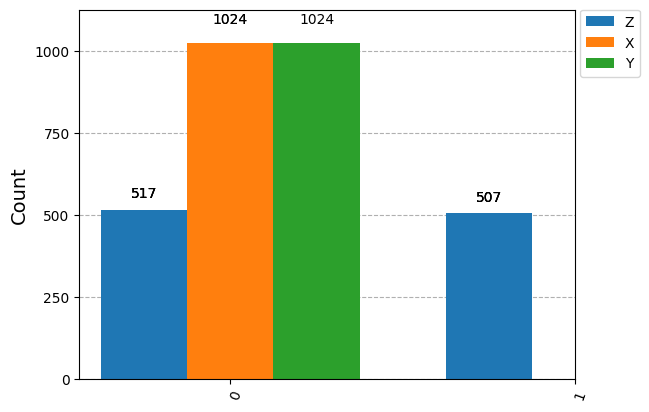

In [6]:
# 히스토그램 시각화
from qiskit.visualization import plot_histogram
plot_histogram([counts_z, counts_x, counts_y], legend=['Z', 'X', 'Y'])